**The goal**: To use tensorflow and find out given the color in the *u, g, r, i, z* SDSS colors, whether the galaxy is spiral or elliptical.

Code by Akash

In [16]:
#import required libraries
import pandas as pd
import numpy as np

#for plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

Import the training data

In [17]:
#read the training data
color_data = pd.read_csv('color_data/train_colors.csv')

#view the data
print(color_data[:3])

                 objid          ra       dec   dered_u   dered_g   dered_r  \
0  1237651735767089483  203.212508  1.776334  20.59246  18.43699  17.29543   
1  1237651736301273204  196.978298  2.410545  20.15860  18.54551  17.60912   
2  1237651736301535411  197.655144  2.354430  17.57647  15.53627  14.64584   

    dered_i   dered_z  spiral  elliptical  
0  16.85062  16.51740       0           1  
1  17.17195  16.85061       0           1  
2  14.23690  13.94348       0           1  


In [18]:
#calculate the dereddened colors
u_g = color_data['dered_u'] - color_data['dered_g']
g_r = color_data['dered_g'] - color_data['dered_r']
r_i = color_data['dered_r'] - color_data['dered_i']
i_z = color_data['dered_i'] - color_data['dered_z']

In [19]:
#stack the colors
train_colors = np.column_stack((u_g.values, g_r.values, r_i.values, i_z.values))
train_color_results = np.array(color_data['spiral'])

Import the testing data

In [20]:
#read the training data
color_data = pd.read_csv('color_data/test_colors.csv')

#view the data
print(color_data[:3])

                 objid          ra        dec   dered_u   dered_g   dered_r  \
0  1237655129304334664  251.372798  40.185917  19.81191  18.12140  17.26343   
1  1237655129304400133  251.437499  40.160755  19.86400  18.09361  17.05764   
2  1237655129841139938  251.623850  40.639430  19.20150  18.26602  17.70823   

    dered_i   dered_z  spiral  elliptical  
0  16.81470  16.48556       1           0  
1  16.56223  16.18970       1           0  
2  17.37052  17.16312       1           0  


In [21]:
test_u_g = color_data['dered_u'] - color_data['dered_g']
test_g_r = color_data['dered_g'] - color_data['dered_r']
test_r_i = color_data['dered_r'] - color_data['dered_i']
test_i_z = color_data['dered_i'] - color_data['dered_z']

In [22]:
#stack the colors
test_col = np.column_stack((test_u_g.values, test_g_r.values, test_r_i.values, test_i_z.values))
test_col_results = np.array(color_data['spiral'])

Import tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import pydot

In [24]:
#fix random seed for reproducibility
seed = 10
np.random.seed(seed)

Design and complie a simple sequencial model

In [25]:
#design a neural network
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#you can print the model
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Train/fit the model

In [26]:
#fit the model
model_info = model.fit(train_colors, train_color_results, epochs=200, batch_size=10, validation_split=0.3, 
                       shuffle=True, verbose=2)

Epoch 1/200
210/210 - 1s - loss: 0.6932 - accuracy: 0.5157 - val_loss: 0.6942 - val_accuracy: 0.4433
Epoch 2/200
210/210 - 1s - loss: 0.6886 - accuracy: 0.5600 - val_loss: 0.6881 - val_accuracy: 0.6711
Epoch 3/200
210/210 - 1s - loss: 0.6804 - accuracy: 0.7738 - val_loss: 0.6781 - val_accuracy: 0.7567
Epoch 4/200
210/210 - 1s - loss: 0.6658 - accuracy: 0.8019 - val_loss: 0.6514 - val_accuracy: 0.7722
Epoch 5/200
210/210 - 1s - loss: 0.6441 - accuracy: 0.7829 - val_loss: 0.6312 - val_accuracy: 0.8044
Epoch 6/200
210/210 - 1s - loss: 0.6181 - accuracy: 0.7871 - val_loss: 0.5954 - val_accuracy: 0.8000
Epoch 7/200
210/210 - 1s - loss: 0.5914 - accuracy: 0.7938 - val_loss: 0.5741 - val_accuracy: 0.8000
Epoch 8/200
210/210 - 1s - loss: 0.5659 - accuracy: 0.7995 - val_loss: 0.5352 - val_accuracy: 0.7678
Epoch 9/200
210/210 - 1s - loss: 0.5429 - accuracy: 0.8081 - val_loss: 0.5190 - val_accuracy: 0.8000
Epoch 10/200
210/210 - 1s - loss: 0.5251 - accuracy: 0.7976 - val_loss: 0.4996 - val_accura

Epoch 82/200
210/210 - 1s - loss: 0.4003 - accuracy: 0.8376 - val_loss: 0.3818 - val_accuracy: 0.8422
Epoch 83/200
210/210 - 1s - loss: 0.4024 - accuracy: 0.8367 - val_loss: 0.3854 - val_accuracy: 0.8444
Epoch 84/200
210/210 - 1s - loss: 0.4002 - accuracy: 0.8381 - val_loss: 0.3809 - val_accuracy: 0.8233
Epoch 85/200
210/210 - 1s - loss: 0.4028 - accuracy: 0.8371 - val_loss: 0.3817 - val_accuracy: 0.8456
Epoch 86/200
210/210 - 1s - loss: 0.4005 - accuracy: 0.8400 - val_loss: 0.3794 - val_accuracy: 0.8289
Epoch 87/200
210/210 - 1s - loss: 0.3996 - accuracy: 0.8386 - val_loss: 0.3800 - val_accuracy: 0.8256
Epoch 88/200
210/210 - 1s - loss: 0.4011 - accuracy: 0.8367 - val_loss: 0.3825 - val_accuracy: 0.8433
Epoch 89/200
210/210 - 1s - loss: 0.4013 - accuracy: 0.8371 - val_loss: 0.3936 - val_accuracy: 0.8433
Epoch 90/200
210/210 - 1s - loss: 0.4009 - accuracy: 0.8390 - val_loss: 0.3899 - val_accuracy: 0.8433
Epoch 91/200
210/210 - 1s - loss: 0.3993 - accuracy: 0.8371 - val_loss: 0.4015 - v

Epoch 162/200
210/210 - 1s - loss: 0.3920 - accuracy: 0.8376 - val_loss: 0.3785 - val_accuracy: 0.8533
Epoch 163/200
210/210 - 1s - loss: 0.3918 - accuracy: 0.8390 - val_loss: 0.3747 - val_accuracy: 0.8478
Epoch 164/200
210/210 - 1s - loss: 0.3929 - accuracy: 0.8376 - val_loss: 0.3726 - val_accuracy: 0.8433
Epoch 165/200
210/210 - 1s - loss: 0.3919 - accuracy: 0.8390 - val_loss: 0.3721 - val_accuracy: 0.8200
Epoch 166/200
210/210 - 1s - loss: 0.3923 - accuracy: 0.8400 - val_loss: 0.3734 - val_accuracy: 0.8489
Epoch 167/200
210/210 - 0s - loss: 0.3913 - accuracy: 0.8357 - val_loss: 0.3816 - val_accuracy: 0.8556
Epoch 168/200
210/210 - 0s - loss: 0.3928 - accuracy: 0.8329 - val_loss: 0.3719 - val_accuracy: 0.8433
Epoch 169/200
210/210 - 1s - loss: 0.3953 - accuracy: 0.8276 - val_loss: 0.3761 - val_accuracy: 0.8489
Epoch 170/200
210/210 - 1s - loss: 0.3928 - accuracy: 0.8390 - val_loss: 0.3793 - val_accuracy: 0.8544
Epoch 171/200
210/210 - 1s - loss: 0.3906 - accuracy: 0.8390 - val_loss: 

Calculate accuracy and plot a accuracy and loss plot

In [27]:
#evaluate the model
scores = model.evaluate(train_colors, train_color_results)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8453

accuracy: 84.53%


In [28]:
model_info.history.keys()
#use these keys while plotting

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

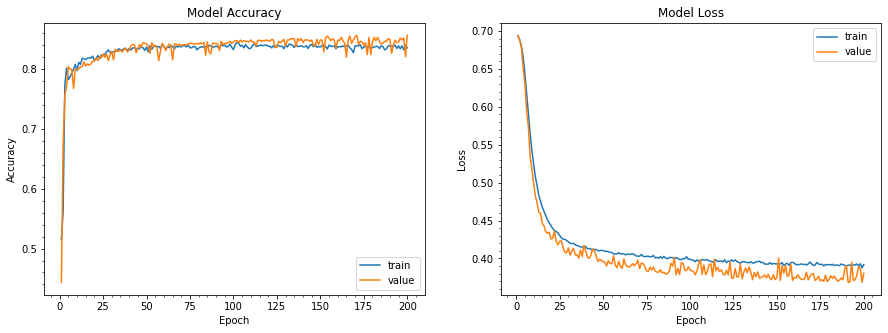

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(range(1,len(model_info.history['accuracy'])+1),model_info.history['accuracy'])
axs[0].plot(range(1,len(model_info.history['val_accuracy'])+1),model_info.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
axs[0].get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
axs[0].legend(['train', 'value'], loc='best')

axs[1].plot(range(1,len(model_info.history['loss'])+1),model_info.history['loss'])
axs[1].plot(range(1,len(model_info.history['val_loss'])+1),model_info.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
axs[1].get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
axs[1].legend(['train', 'value'], loc='best')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
#test the trained model using the test data
test_pred_colors = model.predict(test_col)

#round the probabilities
test_pred_colors = np.around(test_pred_colors)

#print accuracy score
accuracy_score(test_col_results, test_pred_colors)

0.855

#### Note :
The data was provided by Ashish Mahabal during the 7BISS (2020) summer school.